In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
color = sns.color_palette()
%matplotlib inline

t_df = pd.read_json("train.json")
t_df['description'].value_counts()

## No Description 

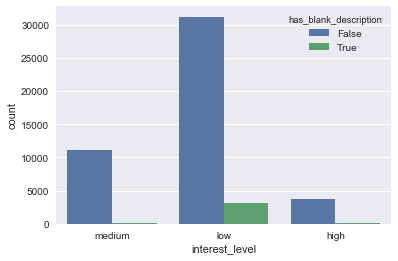

In [12]:
t_df['has_blank_description']= t_df['description'].apply(lambda x: x.strip()) ==""
t_df['has_blank_description'].value_counts()
sns.countplot(x='interest_level',  hue='has_blank_description', data=t_df)


# What are the most common words, bigrams, and trigrams in the description?


In [ ]:
t_df.loc[10,'description']
t_df.loc[100004,'description']


In [101]:
no_dups_description=t_df[['description']].drop_duplicates()
no_dups_description

,description
10,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
10000,
100004,"Top Top West Village location, beautiful Pre-w..."
100007,Building Amenities - Garage - Garden - fitness...
100013,Beautifully renovated 3 bedroom flex 4 bedroom...
100016,Stunning unit with a great location and lots o...
100020,"This huge sunny ,plenty of lights 1 bed/2 bath..."
100026,<p><a website_redacted
100027,This is a spacious four bedroom with every bed...
100030,New to the market! Spacious studio located in ...


In [102]:
import string
from nltk import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    return tokens

def find_ngrams(df):
    word_vectorizer = CountVectorizer(ngram_range=(2,4), analyzer='word', stop_words='english',tokenizer=tokenize)
    sparse_matrix = word_vectorizer.fit_transform(df['description'])
    frequencies = sum(sparse_matrix).toarray()[0]
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort('frequency',ascending=[0])


find_ngrams(no_dups_description)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,frequency
br br,48042
br br br,34607
br br br br,24449
stainless steel,12705
pa websiteredacted,12569
br pa websiteredacted,12426
br pa,12426
hardwood floors,10835
steel appliances,10284
stainless steel appliances,10033


# Does the listing have a phone number? 

In [34]:
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = t_df['description'].str.extract(phone_regex)
t_df['has_phone']=[type(item)==unicode for item in has_phone]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [35]:
t_df['has_phone'].value_counts()

False    27125
True     22227
Name: has_phone, dtype: int64

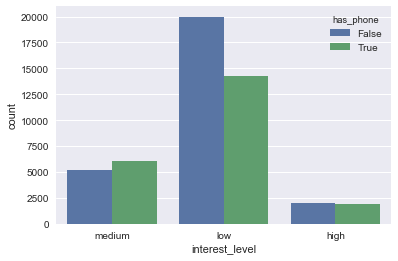

In [43]:
sns.countplot(x='interest_level',  hue='has_phone', data=t_df)


In [53]:
t_df['listing_length']=t_df['description'].str.len()

## How is interest level related to listing length?

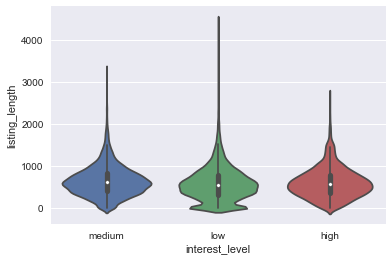

In [54]:
sns.violinplot(x='interest_level',  y='listing_length', data=t_df)


In [86]:
import re 
# http://stackoverflow.com/questions/520031/whats-the-cleanest-way-to-extract-urls-from-a-string-using-python
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|edu|org|gov|ly)\b/?(?!@)))"""

def get_urls(text):
    urls = re.findall(URL_REGEX, text)
    return urls

    
    
t_df['url'] = t_df['description'].apply(get_urls)

t_df['url_count'] =t_df['url'] .apply(len)

t_df['url_count'].value_counts()

0    29051
1    18062
2     1439
6      694
3      102
4        4
Name: url_count, dtype: int64

In [ ]:
#TODO
# Guarantors
# Duplicate
# Call To Actio at end?
# Amount of CAPS 
# Subway Line 
# From brokerage 
# MX id 
# Listing Id 
# Email Address
# Social Media
# has stainless steel
# has hardwood floors
# has broker
# sentiment analyis
# spell check analysis 
# has html tags
# has new
# has free month
# has high celings
# has closet space
# pets
# equal housing